In [77]:
import pandas as pd
import numpy as np

In [78]:
data=pd.read_csv('Sports_Performance_Dataset.csv')

In [79]:
data.head()

,Age,Height,Weight,Training_Hours,Experience,Score,Category
0,24,173,67,13.386694,12,94.055257,Advanced
1,37,164,61,19.021952,14,62.833084,Beginner
2,32,168,58,13.214631,4,79.649237,Intermediate
3,28,149,59,15.092746,11,96.799709,Advanced
4,25,177,71,5.147061,7,83.906125,Intermediate


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1600 non-null   int64  
 1   Height          1600 non-null   int64  
 2   Weight          1600 non-null   int64  
 3   Training_Hours  1600 non-null   float64
 4   Experience      1600 non-null   int64  
 5   Score           1600 non-null   float64
 6   Category        1600 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 87.6+ KB


In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1600.0,28.297500,6.464624,18.000000,22.000000,28.000000,34.000000,39.000000
Height,1600.0,169.356250,9.841169,135.000000,163.000000,170.000000,176.000000,199.000000
Weight,1600.0,69.563125,14.694462,20.000000,59.000000,69.000000,80.000000,115.000000
Training_Hours,1600.0,14.945817,5.793695,5.028567,9.945227,14.832585,20.044350,24.989214
Experience,1600.0,7.031875,4.416509,0.000000,3.000000,7.000000,11.000000,14.000000
Score,1600.0,74.320779,14.168813,50.002641,62.481824,73.822656,86.033156,99.849525


In [82]:
data.isnull().sum()

,0
Age,0
Height,0
Weight,0
Training_Hours,0
Experience,0
Score,0
Category,0


In [83]:
data.duplicated().sum()

0

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-85-b27403bf52ca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', palette='viridis')


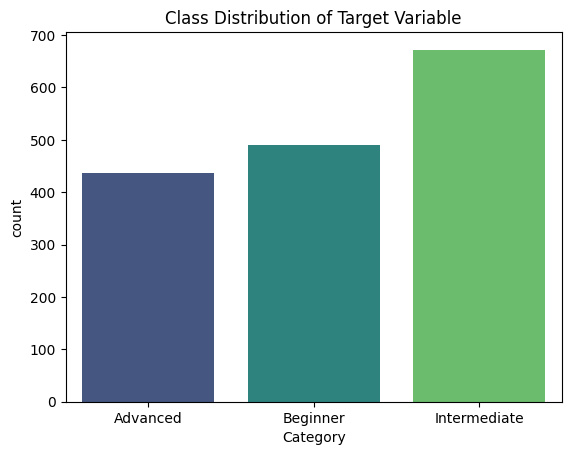

In [85]:
sns.countplot(data=data, x='Category', palette='viridis')
plt.title('Class Distribution of Target Variable')
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

In [87]:
x=data.drop('Category',axis=1)
y=data['Category']

In [88]:
le=LabelEncoder()
y=le.fit_transform(y)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
model=DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,min_samples_split=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10)

In [91]:
model.score(x_train,y_train)

1.0

In [92]:
model.score(x_test,y_test)

1.0

In [93]:
y_pred = model.predict(x_test)

In [94]:
y_train_pred = model.predict(x_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [95]:
y_test_pred = model.predict(x_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 1.0


The Decision Tree model achieved an accuracy of 1.0 on both the training and testing datasets. This indicates that the model perfectly classified all instances, which is uncommon in real-world scenarios.

In [96]:
cm=confusion_matrix(y_test,y_test_pred)

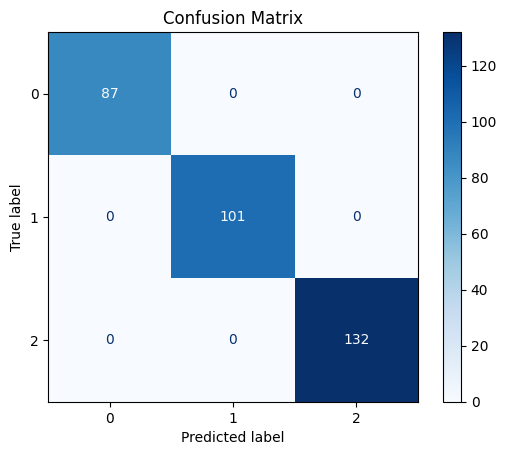

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix indicates that our model performed perfectly on the test dataset, as there are no misclassifications

In [98]:
report = classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(report)

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        87
     Class 2       1.00      1.00      1.00       101
     Class 3       1.00      1.00      1.00       132

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



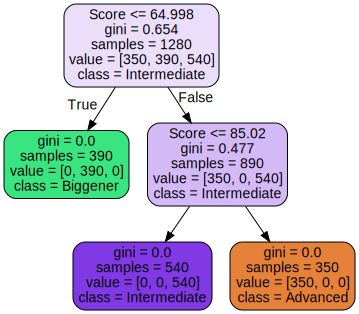

In [99]:
# will plot the tree
graph=export_graphviz(model,feature_names=x.columns,class_names=['Advanced', 'Biggener', 'Intermediate'],filled=True,rounded=True)
tree=graphviz.Source(graph)
tree